# [IAPR][iapr]: Lab 2 ‒  Object description

**Group ID:** 13

**Author 1 (sciper):** Valérie Costa (315855)  
**Author 2 (sciper):** Jennifer Abou-Najm (312656)   
**Author 3 (sciper):** Arthur Wuhrmann (344752)   

**Release date:** 24.03.2023  
**Due date:** 07.04.2023 (11:59 pm)


## Important notes

The lab assignments are designed to teach practical implementation of the topics presented during class well as
preparation for the final project, which is a practical project which ties together the topics of the course.

As such, in the lab assignments/final project, unless otherwise specified, you may, if you choose, use external
functions from image processing/ML libraries like opencv and sklearn as long as there is sufficient explanation
in the lab report. For example, you do not need to implement your own edge detector, etc.

**! Before handling back the notebook <font color='red'> rerun </font>the notebook from scratch !**
`Kernel` > `Restart & Run All`

We will not rerun the notebook for you.


[iapr]: https://github.com/LTS5/iapr

---
## 0. Extract relevant data
We first need to extract the `lab-02-data.tar.gz` archive.
To this end, we use the [tarfile] module from the Python standard library. In the `lab-02-data` folder, you will find 28x28 grey-scale pictures of handwritten "0", "1", "2" and "3".
These digits have been extracted from MNIST dataset (http://yann.lecun.com/exdb/mnist/).

[tarfile]: https://docs.python.org/3.6/library/tarfile.html

In [1]:
import sys
sys.path.append("C:/Users/User/AppData/Local/Programs/Python/Python310/Lib/site-packages")

In [2]:
import tarfile
import os

data_base_path = os.path.join(os.pardir, 'data')
data_folder = 'lab-02-data'
data_part1 = os.path.join(data_base_path, data_folder, 'part1')
data_part2 = os.path.join(data_base_path, data_folder, 'part2')

tar_path = os.path.join(data_base_path, data_folder + '.tar.gz')
with tarfile.open(tar_path, mode='r:gz') as tar:
    tar.extractall(path=data_base_path)

### 0.1.Data visualization

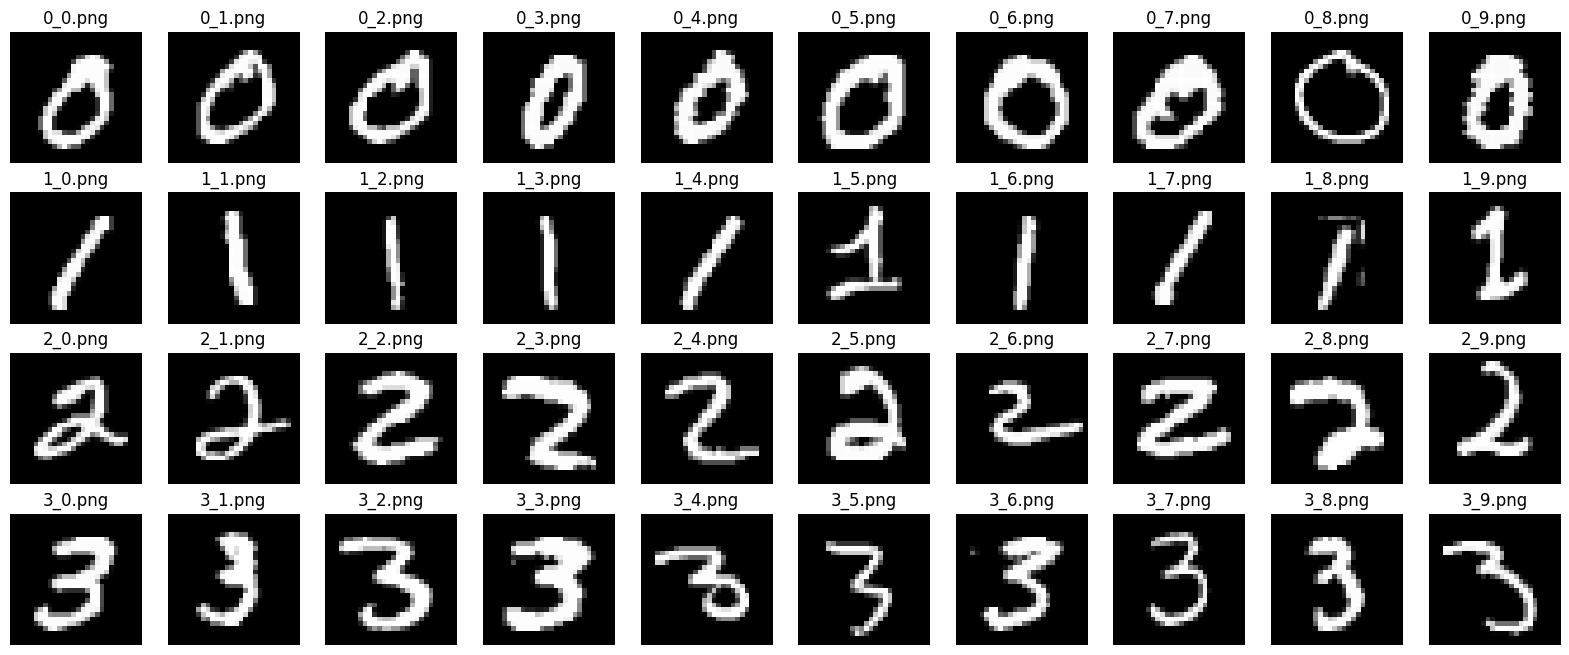

In [3]:
import skimage.io
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

def load(path, digit='0'):
    digit_path = os.path.join(path, digit)
    digit_names = [nm for nm in os.listdir(digit_path) if '.png' in nm]  # make sure to only load .png
    digit_names.sort()  # sort file names
    ic = skimage.io.imread_collection([os.path.join(digit_path, nm) for nm in digit_names])
    digit_im = skimage.io.concatenate_images(ic)
    return digit_im, digit_names
                        
# Load digits data

# Zero images arrays
zeros_im, zeros_names = load(data_part1, digit='0')
# Ones images arrays
ones_im, ones_names = load(data_part1, digit='1')
# Twos images arrays
twos_im, twos_names = load(data_part2, digit='2')
# Threes images arrays
threes_im, threes_names = load(data_part2, digit='3')

# Plot images
fig, axes = plt.subplots(4, len(zeros_im), figsize=(20, 8))
for ax, im, nm in zip(axes[0], zeros_im, zeros_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
for ax, im, nm in zip(axes[1], ones_im, ones_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
for ax, im, nm in zip(axes[2], twos_im, twos_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
for ax, im, nm in zip(axes[3], threes_im, threes_names):
    ax.imshow(im, cmap='gray' ,interpolation="nearest")
    ax.axis('off')
    ax.set_title(nm)

---
## Part 1 - contour based descriptors (18 pts)

In this part you will use images of "0"s and "1"s.

**Objectives overview**: Fourier Descriptors


**1)** *Preprocess*: Select ONLY "0" and "1" images and apply suitable preprocessing. Show a plot with the preprocessed data and give arguments on the chosen techniques. (**2 pts**)


**2)** *Get descriptors*: Find the contours and get the Fourier descriptors in complex definition. *Note*: The contours arrays should contain a finite number (N-> self-chosen) of equi-distant points for each image (hint: interpolation). In the case of the "0" contours, just keep the outermost contour. Discuss the necessity of this format. (**4 pts**)
    
    
**3)** *Study effect of descriptors* : Show the contour-reconstruction of the digits using different amount of descriptors (both for ONE "0" image and ONE "1" image)
- Make 5 plots, reconstructing the digits' countours using different amounts of descriptors. (e.g. reconstruct the contour using the only the 1st fourier descriptor, reconstruct using the first two fourier descriptors,  using the first three ...)  
- **Hint**: check scipy fft, ifft, and fftfreq functions (see [link](https://docs.scipy.org/doc/scipy/tutorial/fft.html)) and pay attention on the ordering, observing which coefficients correspond to positive/negative frequencies of components and how you choose your low frequency subsets . 
- **Extra hint** To reconstruct the contour, copy the original vector of the fourier descriptors, keep the positive an negative frequencies you will use, and set to 0 the rest. (e.g. If you want to reconstruc the image with the first _three fourier descriptors_, keep the first _three positive frecuencies_ and their respective _three negative frequencies_ (see positive and negative bin freque
    frequencies [link](https://docs.scipy.org/doc/scipy/reference/generated/scipy.fft.fftfreq.html#scipy.fft.fftfreq) ). 
- Discuss about your findings. (**4 pts**)
    
        
**4)** *Clustering*: For each image containing a "0" or a "1", using the fourier descriptors, extract a 2-dimensional feature vector (using the THE POSITIVE bin frequencies from fftfreq, see [link](https://docs.scipy.org/doc/scipy/reference/generated/scipy.fft.fftfreq.html#scipy.fft.fftfreq) ) and plot all of them on a 2D graph. Did you obtain a plot where the vectors of the "0"'s nicely cluster in one part of the plane and those of the "1"'s in the other? If yes, explain why. (**2 pts**)
    
    
**5)** *Show translation, rotation and scale invariance*
- Firstly, discuss which descriptors, or which part of the descriptors are affected by each transformation. For each transformation define (write in words) an operation which will be applied to the descriptor arrays, such that they will be invariant to (not affected by) the specific transformation anymore. After finding the necessary operations, define a function that will make the Fourier descriptors invariant to all the transformations, altogether.(**3 pts**) 
- Secondly, show that if you are using descriptors invariant to transformations, you still obtain 2 nicely defined clusters for the 2 categories of numbers, under transformations applied. (You need to define custom functions for each transformation, apply them on images, and compare the obtained invariant descriptors). Discuss your findings. (**3 pts**)

### 1. Fourier Descriptors

### 1.1. Preprocess and visualization (2 pts)

In [4]:
#Valerie, je sais pas a quel point c'est ouf de remove_small_holes si c'est pas un zero, ca fait des trucs
# legerement bizarre avec les 1 je trouve

def preprocess(image):
    d = 2
    if image.size < 400:
        d = 1
    pre = skimage.filters.median(image, footprint=skimage.morphology.disk(d))
    pre = skimage.morphology.remove_small_holes(
        pre > 50, round(0.3*image.size))
    pre = skimage.morphology.remove_small_objects(pre, 5)
    return pre


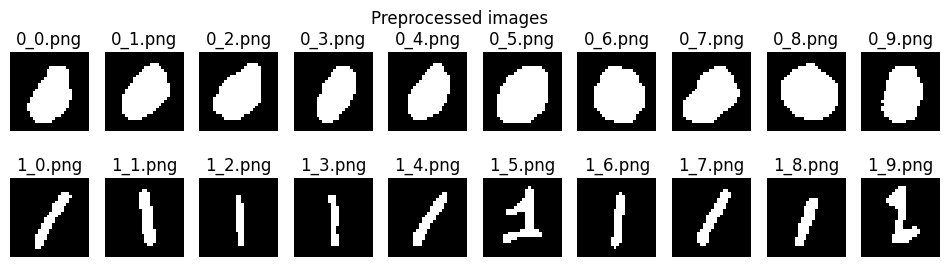

In [5]:
# TODO: Fill the lists below with your preprocessed images of "0"s and "1"s  
zeros = []
ones = []

for img in zeros_im:
    zeros.append(preprocess(img))
for img in ones_im:
    ones.append(preprocess(img))

# Plot images
fig, axes = plt.subplots(2, len(zeros), figsize=(12, 3))
for ax, im, nm in zip(axes[0], zeros, zeros_names):
    ax.imshow(im, cmap='gray', interpolation="nearest")
    ax.axis('off')
    ax.set_title(nm)
for ax, im, nm in zip(axes[1], ones, ones_names):
    ax.imshow(im, cmap='gray', interpolation="nearest")
    ax.axis('off')
    ax.set_title(nm)
fig.suptitle("Preprocessed images")
plt.show()

In [6]:
def find_contour(img):
    contours = skimage.measure.find_contours(img)
    contour = np.array(sorted(contours, key=lambda c: -len(c))[0])
    return contour

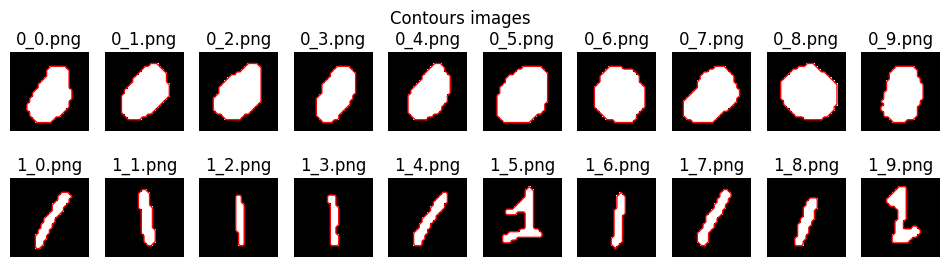

In [7]:
# Plot contours
fig, axes = plt.subplots(2, len(zeros), figsize=(12, 3))
for ax, im, nm in zip(axes[0], zeros, zeros_names):
    ax.imshow(im, cmap='gray', interpolation="nearest")
    ax.axis('off')
    ax.set_title(nm)
    contour = find_contour(im)
    ax.plot(contour[:, 1], contour[:, 0], linewidth=1, color="r")
for ax, im, nm in zip(axes[1], ones, ones_names):
    ax.imshow(im, cmap='gray', interpolation="nearest")
    ax.axis('off')
    ax.set_title(nm)
    contour = find_contour(im)
    ax.plot(contour[:, 1], contour[:, 0], linewidth=1, color="r")
fig.suptitle("Contours images")
plt.show()


#### Discussion

To redefine the contours, we first applied a median filter. The radius of the disk used as a footprint depended on the image size. This was particularly important in part 5, where the image was scaled down, and the original disk size would have been too large in comparison to the image size.

Next, we closed the inside of the zeros to ensure that only one contour remained in the image. Additionally, we removed any remaining small local peaks by eliminating small objects. This step was crucial in preventing the `find_contours` function from detecting extraneous contours that could interfere with identifying the desired longer contour.

Despite these initial processing steps, we found that they were not sufficient to prevent unwanted contours from being identified in part 5. Therefore, we also sorted the contours to ensure that the desired contour (the longer) was identified correctly.

### 1.2. Get descriptors (4 pts)

In [8]:
# Function that takes as input an image and returns a set of descriptors. 
# You may use other custom helper functions to break the code into useful chuncks.

def interpolate_signal(contour, n):
    for i in range(2):
        time_series = contour[:-1,i]
        dist = np.sqrt(np.sum((contour[:-1] - contour[1:])**2, axis=1))
        timestamps = np.cumsum(dist)-1 
        f = scipy.interpolate.interp1d(timestamps, time_series, kind="cubic")
        min = np.min(timestamps)
        max = np.max(timestamps)
        new_timestamps = np.arange(min, max, (max-min)/n)
        if i == 0:
            result = f(new_timestamps)
        else : 
            result = result+ 1j*f(new_timestamps)
    return result

def get_descriptors(img):
    contour = find_contour(img)
    descriptors = np.fft.fft(interpolate_signal(contour, 20))
    return descriptors

# Check first 10 descriptors of a test image (just to check that your pipeline works well)
print(get_descriptors(zeros[0])[:10])

[293.64914471+2.82186909e+02j  15.71760568-2.91757313e+01j
  -8.1786397 +5.03924646e+00j   0.66759539-1.27517516e+00j
   1.20041747-1.72065864e+00j   1.23555053+2.38679684e+00j
  -1.90955141-1.62876913e+00j   0.81220938-2.28743110e-01j
  -0.61325661+4.49074647e-01j   2.78410499-1.02113177e+00j]


#### Discussion

Interpolating and resampling the signal is a critical step prior to taking the Fourier transform. The reason is that the function np.fft.fft assumes that the sampled points of our contour are equidistant, which is not the case at the beginning. Some points are at a distance of $1$ from each other, while others are at a distance of $\sqrt{2}$. To address this issue, we interpolated and resampled the signal.

Another important consideration is that some contours may be longer than others. By resampling the image, we ensured that each contour had the same number of points ($20$ in our case). This step allowed us to have an equal amount of information in each image, enabling fair comparisons between them.

### 1.3. Study effect of descriptors (6 pts)

In [9]:
def get_contours(descriptors,num):
    des = descriptors.copy()
    des[0]=0
    des[num+1:-num]=0
    ft = np.fft.ifft(des)
    x=np.real(ft)
    y=np.imag(ft)
    return np.array([x,y])

In [10]:
# Define increasing set sizes of the descriptors. You can also change these numbers.
descr_set_sizes = [1, 2, 5, 10, 20]

# Define images for which you will show the recovery. You can also change the indexes.
zero = zeros_im[0]
one = ones_im[0]

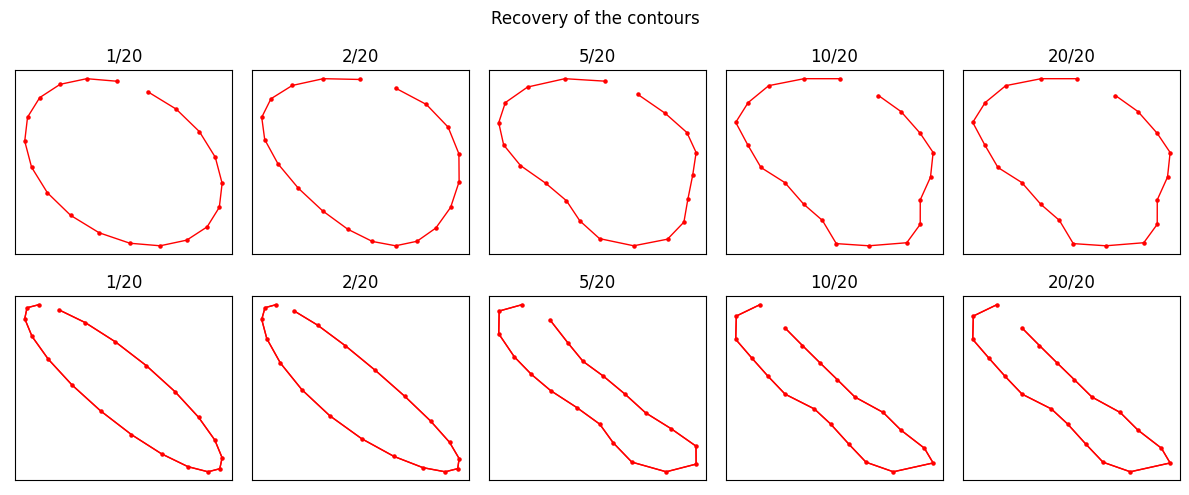

In [12]:
# On each of the 5 plots you will show the recovery for a "0" and a "1" (used the same axis for both a "0" and a "1").


# on veut que 5 plots en tout, a changer, mais ton code ne compile pas chez moi Valerie, je peux pas changer

fig, axes = plt.subplots(2, 5, figsize=(12, 5))


# Plot recovery for a zero image
for i in range(0,  5):
    ax.imshow(preprocess(zero), cmap='gray')
    ax.axis('off')
    descriptors = get_descriptors(preprocess(zero))
    contours = get_contours(descriptors, descr_set_sizes[i])
    axes[0, i].scatter(contours[1]+im.shape[0]//2,
                       contours[0]+im.shape[1]//2, s=5, color="r")
    axes[0, i].plot(contours[1]+im.shape[0]//2,
                    contours[0]+im.shape[1]//2,  linewidth=1, color="r")
    axes[0, i].set_xticks([])
    axes[0, i].set_yticks([])
    axes[0, i].set_title(f"{descr_set_sizes[i]}/20")

# Plot recovery for a one image
for i in range(0,  5):
    ax.imshow(preprocess(one), cmap='gray')
    ax.axis('off')
    descriptors = get_descriptors(preprocess(one))
    contours = get_contours(descriptors, descr_set_sizes[i])
    axes[1, i].scatter(contours[1]+im.shape[0]//2,
                       contours[0]+im.shape[1]//2, s=5, color="r")
    axes[1, i].plot(contours[1]+im.shape[0]//2,
                    contours[0]+im.shape[1]//2,  linewidth=1, color="r")
    axes[1, i].plot(contours[1]+im.shape[0]//2,
                    contours[0]+im.shape[1]//2,  linewidth=1, color="r")
    axes[1, i].set_xticks([])
    axes[1, i].set_yticks([])
    axes[1, i].set_title(f"{descr_set_sizes[i]}/20")

fig.suptitle("Recovery of the contours")
plt.tight_layout()


#### Discussion

The plots shown above clearly demonstrate the impact of the number of Fourier descriptors on the contour reconstruction of the digits. Interestingly, it was observed that the digits "one" and "zero" can be easily recognized using only one frequency content. This suggests that Fourier descriptors can effectively cluster "one" and "zero" with just one descriptor.

Increasing the number of Fourier descriptors resulted in a significant improvement in the accuracy of the contour reconstruction for both digits. A nearly perfect representation of the original contour was achieved using more than five descriptors. This can be attributed to the fact that the initial descriptors capture the most significant information about the digit's shape.

It is worth noting that the higher frequency content, which has lower amplitude, primarily refines the contour details. Therefore, including more Fourier descriptors beyond a certain point does not significantly contribute to the representation of the digit's shape.



First, using only one descriptor does not provide sufficient information to accurately reconstruct the digit's contour, although we can differentiate between the two digits. However, as the number of descriptors increases, the accuracy of the contour-reconstruction improves.

Additionally, for both digits, a contour-reconstruction using more than five descriptors provides a nearly perfect representation of the original contour. This is because the first descriptors are significant and capture the majority of the information about the digit's shape.

In conclusion, Fourier descriptors are an effective method for contour-reconstruction of digits, and the number of descriptors used significantly affects the reconstruction's accuracy. Moreover, the first few descriptors contain most of the information about the digit's shape, and including more descriptors can improve the representation of the digit's original contour.

TODO

### 1.4 Clustering (2 pts)

In [13]:
#je trouve pas ca incroyablement ouf de hardcode pour le 1 et le 3, car on peut plus trop essayer autre chose 

def clustering(list_img):
    descriptors = np.empty((2,len(list_img)))
    for i,im in enumerate(list_img) :
        descriptors[:,i]= np.abs(get_descriptors(im)[1:5:2]) # freq 1 and 3
    return descriptors

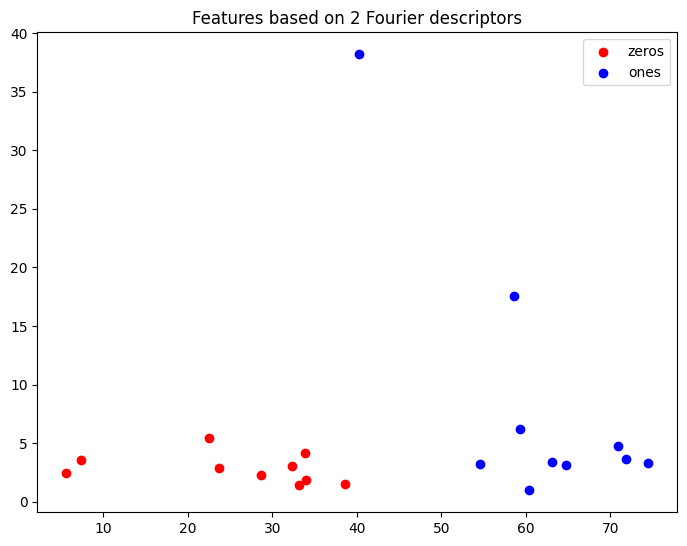

In [14]:
# TODO: You should fill the lists below, with your features

# First feature for all "0"s
zeros_f1 = clustering(zeros)[0]
# Second feature for all "0"s
zeros_f2 = clustering(zeros)[1]
# Fist feature for all "1"s
ones_f1 = clustering(ones)[0]
# Second feature for all "1"s
ones_f2 = clustering(ones)[1]

# Plot features for all images
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.scatter(zeros_f1, zeros_f2, color='r', label='zeros')
ax.scatter(ones_f1, ones_f2, color='b', label='ones')
ax.legend(loc='best')
plt.title("Features based on 2 Fourier descriptors")
plt.show()

#### Discussion


In the previous part, we observed that even with only one Fourier descriptor, we were able to get a good indication of whether the digit was a "one" or a "zero". Indeed, the first frequency component (x axis) was almost clustering the digits. However, in order to be more robust to outliers, it is recommended to use a second descriptor. We experimented with different frequencies and found that using the first and third descriptors allowed us to perfectly cluster the digits.

It is worth noting that the descriptors used in this method are already invariant to translation and rotation. This is because we used the amplitude at each frequency, and did not include the DC frequency component, which ensures that the descriptors are not affected by translation. Moreover, the Fourier descriptors are also invariant to rotation, as the amplitude at each frequency remains unchanged regardless of the orientation of the image.

Based on the plots obtained, we can see that the feature vectors of "0" and "1" digits are linearly separable using the first feature and third feature only. Although they do not cluster completely, as we can see with the ones, it is enough to differentiate them. This indicates that the two Fourier descriptors are effective in capturing the distinct features of the two digits, enabling them to be separated into two different groups. 

It is important to note that the descriptors used here are already invariant to translation and rotation

TODO

### 1.5 Transformation invariance (6 pts)

#### Preliminary discussion

Translation is a transformation that shifts an image in a specific direction without changing its shape or size. In the Fourier descriptors, translation affects only the DC component of the Fourier transform, which is represented by $f_0$. To make the Fourier descriptors invariant to translation, we can simply discard the DC component ($f_0$) when computing the descriptors.  

Rotation is a transformation that rotates an image around its center. In the Fourier descriptors, rotation affects only the phase of the descriptors (by the same amount), and does not modify their amplitude. To make the Fourier descriptors invariant to rotation, we can simply take the absolute value of the descriptors, which removes the phase information and retains only the magnitudes.


Scaling is a transformation that changes the size of an image without changing its shape or orientation. It affects all the Fourier descriptors, as they will all be multiplied by the scaling factor. However, the ratio between two Fourier descriptors does not change (as the scaling factor will be canceled out).
To make the Fourier descriptors scale invariant, we divided them by the norm of one Fourier descriptor we are not using, thus preserving the ratio.

TODO

#### Implementation

In [15]:
from skimage.transform import AffineTransform, warp, rotate, rescale, resize
import random
random.seed(2)

# Define custom rotation function. You may add other parameters to the function.
def random_rotate(img):
    angle = random.uniform(0,359)
    rotated_img = rotate(1*img, angle, preserve_range=True, order=3)
    return rotated_img

# Define custom translation function. You may add other parameters to the function.
def random_translate(img):
    delta_x = random.uniform(-2, 2)
    delta_y = random.uniform(-2, 2)
    transform = AffineTransform(translation=(delta_x, delta_y))
    img_shifted = warp(img, transform, preserve_range=True, order=3)
    return img_shifted
    
# Define custom scaling function. You may add other parameters to the function.
def random_scale(img):
    scale_factor = random.uniform(
        1/2, 2
    )  
    scaled_img = rescale(1*img, scale_factor, preserve_range=True, order=3)
    return scaled_img

In [16]:
# We will define 4 sets of new images below

# TODO: Apply only rotation for each "0" and "1" and store results below
rotated_images_zeros = []
rotated_images_ones = []

# TODO: Apply only translation for each "0" and "1" and store results below
translated_images_zeros = []
translated_images_ones = []

# TODO: Apply only scaling for each "0" and "1" and store results below
scaled_images_zeros = []
scaled_images_ones = []

# TODO: Apply all 3 transformations sequentially, in your custom order, for each "0" and "1" and store results below
transformed_images_zeros = []
transformed_images_ones = []

for img in zeros_im:
    rotated_images_zeros.append(preprocess(random_rotate(img)))
    translated_images_zeros.append(preprocess(random_translate(img)))
    scaled_images_zeros.append(preprocess(random_scale(img)))
    transformed_images_zeros.append(preprocess(random_scale(random_translate(random_rotate(img)))))
for img in ones_im:
    rotated_images_ones.append(preprocess(random_rotate(img)))
    translated_images_ones.append(preprocess(random_translate(img)))
    scaled_images_ones.append(preprocess(random_scale(img)))
    transformed_images_ones.append(preprocess(random_scale(random_translate(random_rotate(img)))))

In [17]:
transforms = {
    "Invariant to Rotation": {
        "inv_to_rotation": True,
        "inv_to_translation": False,
        "inv_to_scale": False,
    },
    "Invariant to Translation": {
        "inv_to_rotation": False,
        "inv_to_translation": True,
        "inv_to_scale": False,
    },
    "Invariant to Scale": {
        "inv_to_rotation": False,
        "inv_to_translation": False,
        "inv_to_scale": True,
    },
    "Invariant to Transformation": {
        "inv_to_rotation": True,
        "inv_to_translation": True,
        "inv_to_scale": True,
    },
}

transformed_img = [
    [rotated_images_zeros, rotated_images_ones],
    [translated_images_zeros, translated_images_ones],
    [scaled_images_zeros, scaled_images_ones],
    [transformed_images_zeros, transformed_images_ones],
]

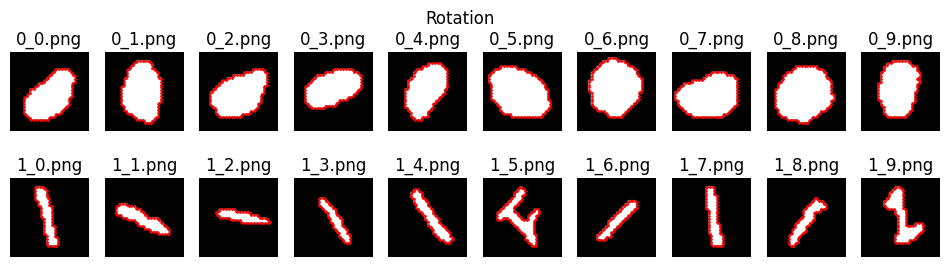

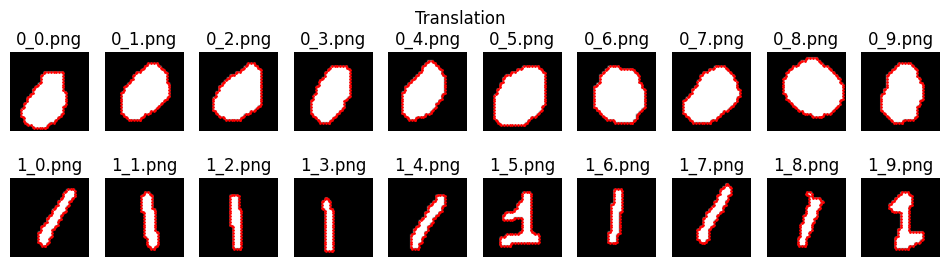

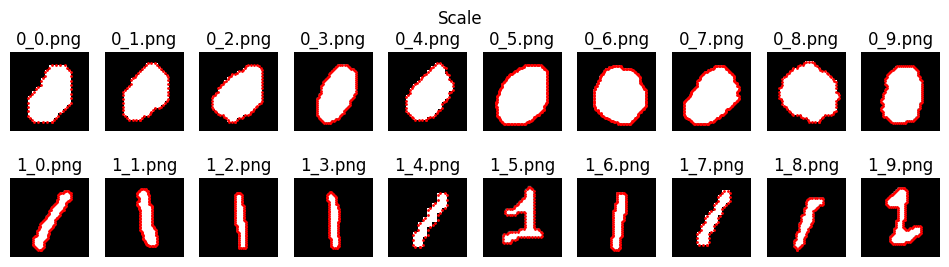

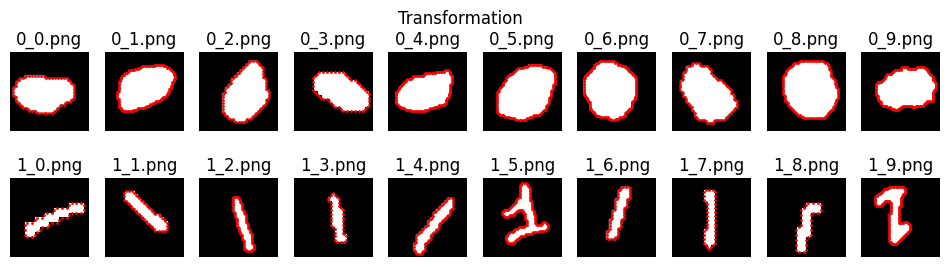

In [18]:
for i , transform in enumerate(transforms):
    fig, axes = plt.subplots(2, len(zeros), figsize=(12, 3))
    for ax, im, nm in zip(axes[0], transformed_img[i][0], zeros_names):
        ax.imshow(im, cmap='gray')
        ax.axis('off')
        ax.set_title(nm)
        contour = find_contour(im)
        ax.scatter(contour[:,1],contour[:,0],s=1, color="r")
    for ax, im, nm in zip(axes[1], transformed_img[i][1], ones_names):
        ax.imshow(im, cmap='gray')
        ax.axis('off')
        ax.set_title(nm)
        contour = find_contour(im)
        ax.scatter(contour[:,1],contour[:,0],s=1, color="r")
    fig.suptitle(transform[13:])
    plt.show()

In [19]:
# TODO: Implement a function that takes as input an image and outputs
# a set of features invariant to scale, rotation and translation, according to function boolean parameters.
# You may use your functions defined in section 1.B.

def get_invariant_features(
    img,
    inv_to_rotation=False,
    inv_to_translation=False,
    inv_to_scale=False,
):
    result = np.abs(get_descriptors(img)[1:5:2])
    if inv_to_rotation : # already invariant to rotation because modulus is taken
        pass
    if inv_to_translation : #already invariant to translation because f[0] not used
        pass
    if inv_to_scale: 
        ft = get_descriptors(img)
        result = np.real(ft[1:3:1])/np.real(ft[-1])

    return result   

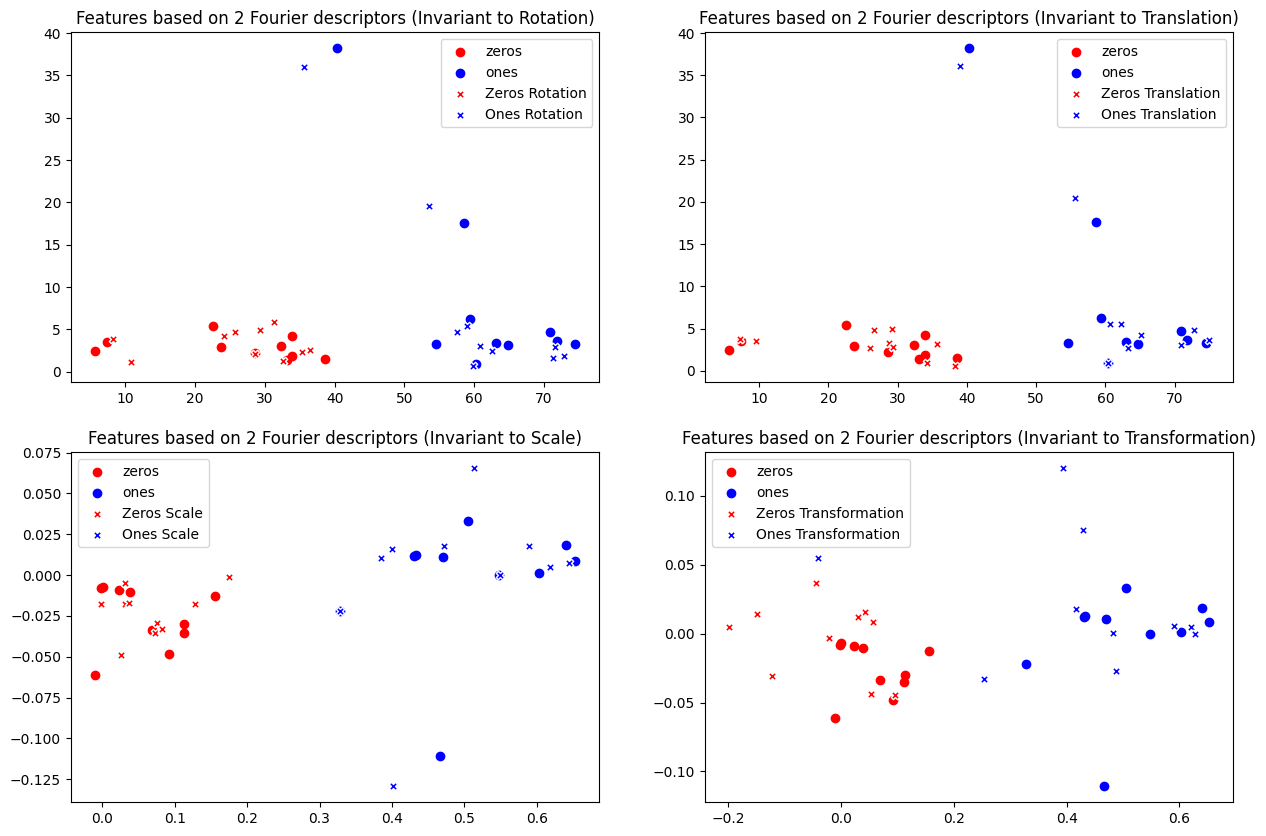

In [20]:
fig, ax = plt.subplots(2,2, figsize=(15,10))
ax_list = ax.ravel()
for i, transform in enumerate(transforms):
    # First feature for all "0"s
    zeros_f1 = []
    zeros_f1_transformed = []
    # Second feature for all "0"s
    zeros_f2 = []
    zeros_f2_transformed = []
    # Fist feature for all "1"s
    ones_f1 = []
    ones_f1_transformed = []
    # Second feature for all "1"s
    ones_f2 = []
    ones_f2_transformed = []
    
    for zero, one, zero_transformed, one_transformed in zip(zeros,ones, *transformed_img[i]):
        zero_f = get_invariant_features(zero, **transforms[transform])
        zeros_f1.append(zero_f[0])
        zeros_f2.append(zero_f[1])
        
        one_f = get_invariant_features(one, **transforms[transform])
        ones_f1.append(one_f[0])
        ones_f2.append(one_f[1])
        
        zero_transformed_f = get_invariant_features(zero_transformed, **transforms[transform])
        zeros_f1_transformed.append(zero_transformed_f[0])
        zeros_f2_transformed.append(zero_transformed_f[1])
        
        one_transformed_f = get_invariant_features(one_transformed, **transforms[transform])
        ones_f1_transformed.append(one_transformed_f[0])
        ones_f2_transformed.append(one_transformed_f[1])

    ax_list[i].scatter(zeros_f1, zeros_f2, color="r", label="zeros")
    ax_list[i].scatter(ones_f1, ones_f2, color="b", label="ones")
    ax_list[i].scatter(
        zeros_f1_transformed,
        zeros_f2_transformed,
        color="r",
        marker="X",
        edgecolor="white",
        label=f"Zeros {transform[13:]}",
    )
    ax_list[i].scatter(
        ones_f1_transformed,
        ones_f2_transformed,
        color="b",
        marker="X",
        edgecolor="white",
        label=f"Ones {transform[13:]}",
    )
    ax_list[i].legend(loc="best")
    ax_list[i].set_title(f"Features based on 2 Fourier descriptors ({transform})")
plt.show()

In [21]:
# For each of the 4 sets of "0"s and "1"s above, you should find the invaiant features
# and make a plot (similar to section 1.4) - 4 plots in total!
# Use a proper labeling/legend for the plots!

def random_translate_contour(input, image=True):
    if image : 
        contour = find_contour(input)
    else :
        contour = input.copy()
    delta_x = random.randint(-10, 10)
    delta_y = random.randint(-10, 10)
    contour[:, 0] = contour[:, 0] + delta_x
    contour[:, 1] = contour[:, 1] + delta_y
    return contour


def random_rotate_contour(input, image=True):
    # Rotation around (0,0) which correspond to top left corner in image
    # Not exactly equivalent to image rotation (translation added)
    if image:
        contour = find_contour(input)
    else:
        contour = input.copy()
    angle = random.uniform(0, 360) * np.pi/180
    rotation_matrix = np.array(
        [[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]]
    )
    rotated_contour = rotation_matrix @ contour.T
    return rotated_contour.T

def random_scale_contour(input, image = True):
    if image:
        contour = find_contour(input)
    else:
        contour = input.copy()
    scale = random.uniform(1/2,2)
    contour[:, 0] = contour[:, 0] * scale
    contour[:, 1] = contour[:, 1] * scale
    return contour

In [22]:
# We will define 4 sets of new images below

# TODO: Apply only rotation for each "0" and "1" and store results below
rotated_contours_zeros = []
rotated_contours_ones = []

# TODO: Apply only translation for each "0" and "1" and store results below
translated_contours_zeros = []
translated_contours_ones = []

# TODO: Apply only scaling for each "0" and "1" and store results below
scaled_contours_zeros = []
scaled_contours_ones = []

# TODO: Apply all 3 transformations sequentially, in your custom order, for each "0" and "1" and store results below
transformed_contours_zeros = []
transformed_contours_ones = []

for zero in zeros:
    translated_contours_zeros.append(random_translate_contour(zero))
    rotated_contours_zeros.append(random_rotate_contour(zero))
    scaled_contours_zeros.append(random_scale_contour(zero))
    transformed_contours_zeros.append(
        random_scale_contour(random_translate_contour(random_rotate_contour(zero), image=False), image=False,))



for one in ones:
    translated_contours_ones.append(random_translate_contour(one))
    rotated_contours_ones.append(random_rotate_contour(one))
    scaled_contours_ones.append(random_scale_contour(one))
    transformed_contours_ones.append(
        random_scale_contour(random_translate_contour(random_rotate_contour(one), image=False), image=False,))


In [23]:
transformed_contours = [
    [rotated_contours_zeros, rotated_contours_ones],
    [translated_contours_zeros, translated_contours_ones],
    [scaled_contours_zeros, scaled_contours_ones],
    [transformed_contours_zeros, transformed_contours_ones],
]

In [24]:
def get_invariant_features_contours(
    contour,
    inv_to_rotation=False,
    inv_to_translation=False,
    inv_to_scale=False,
):
    descriptors = np.fft.fft(interpolate_signal(contour, 20))
    features = np.abs(descriptors[1:5:2])  # freq 1 and 3
    if inv_to_rotation:  # already invariant to rotation because modulus is taken 
        pass
    # already invariant to translation because f[0] not used
    if inv_to_translation:
        pass
    if inv_to_scale:
        features = np.real(descriptors[1:3:1])/np.real(descriptors[-1])

    return features

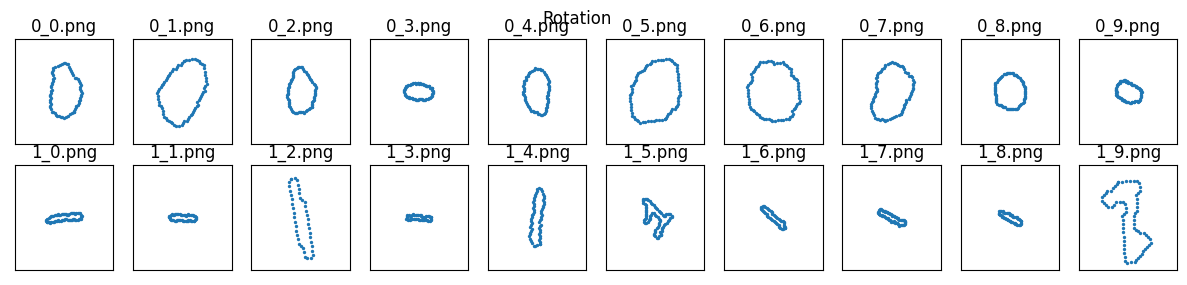

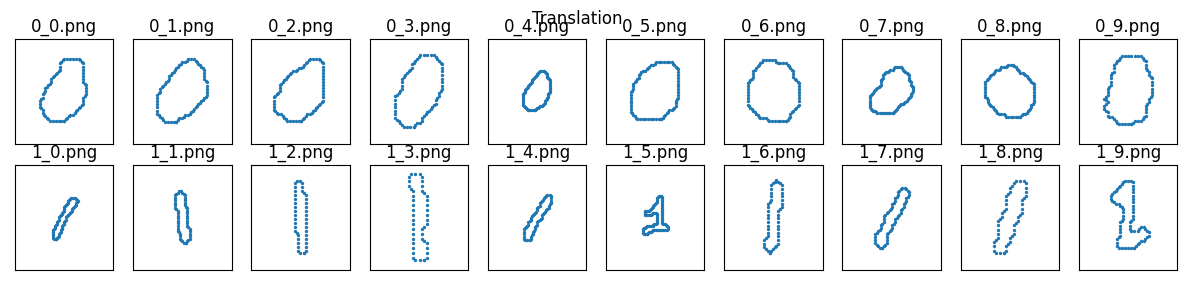

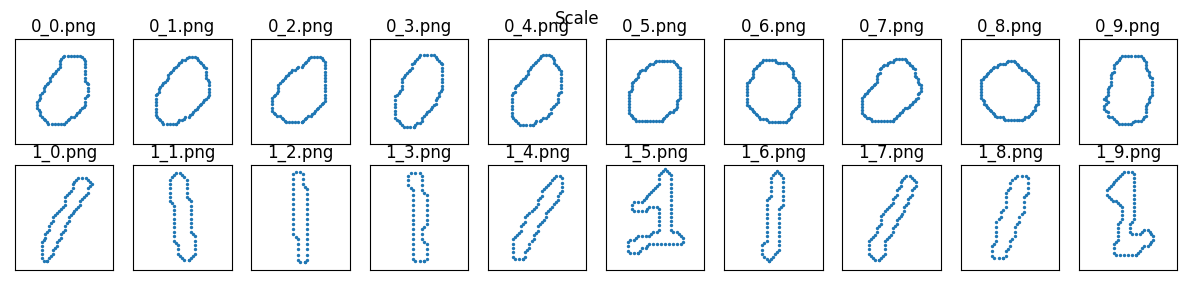

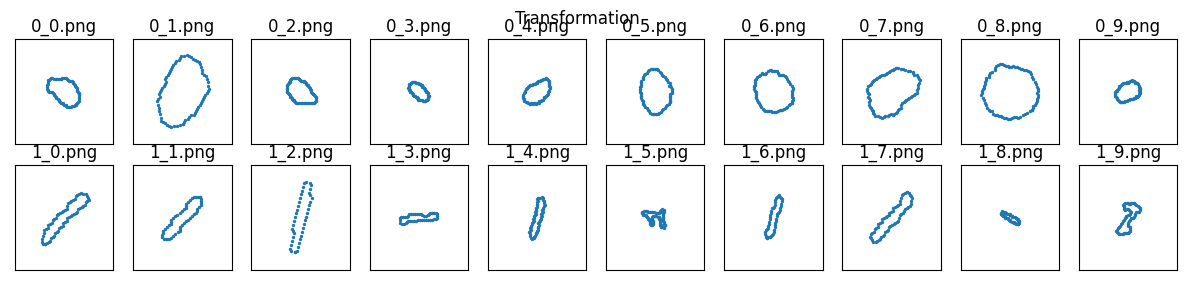

In [25]:
for i , transform in enumerate(transforms):
    fig, axes = plt.subplots(2, len(zeros), figsize=(15, 3))
    for ax, c, nm in zip(axes[0], transformed_contours[i][0], zeros_names):
        m1,m2 = np.mean(c, axis=0)
        std = np.std(c)
        ax.scatter(c[:,1],-c[:,0], s=2)
        ax.set_title(nm)
        ax.set_xlim(m2-2.5*std,m2+2.5*std)
        ax.set_ylim(-m1-2.5*std,-m1+2.5*std)
        ax.set_xticks([])
        ax.set_yticks([])
    for ax, c, nm in zip(axes[1], transformed_contours[i][1], ones_names):
        m1,m2 = np.mean(c, axis=0)
        std = np.std(c)
        ax.scatter(c[:,1],-c[:,0], s=2)
        ax.set_title(nm)
        ax.set_xlim(m2-2.5*std,m2+2.5*std)
        ax.set_ylim(-m1-2.5*std,-m1+2.5*std)
        ax.set_xticks([])
        ax.set_yticks([])
        
    fig.suptitle(transform[13:])
    plt.show()

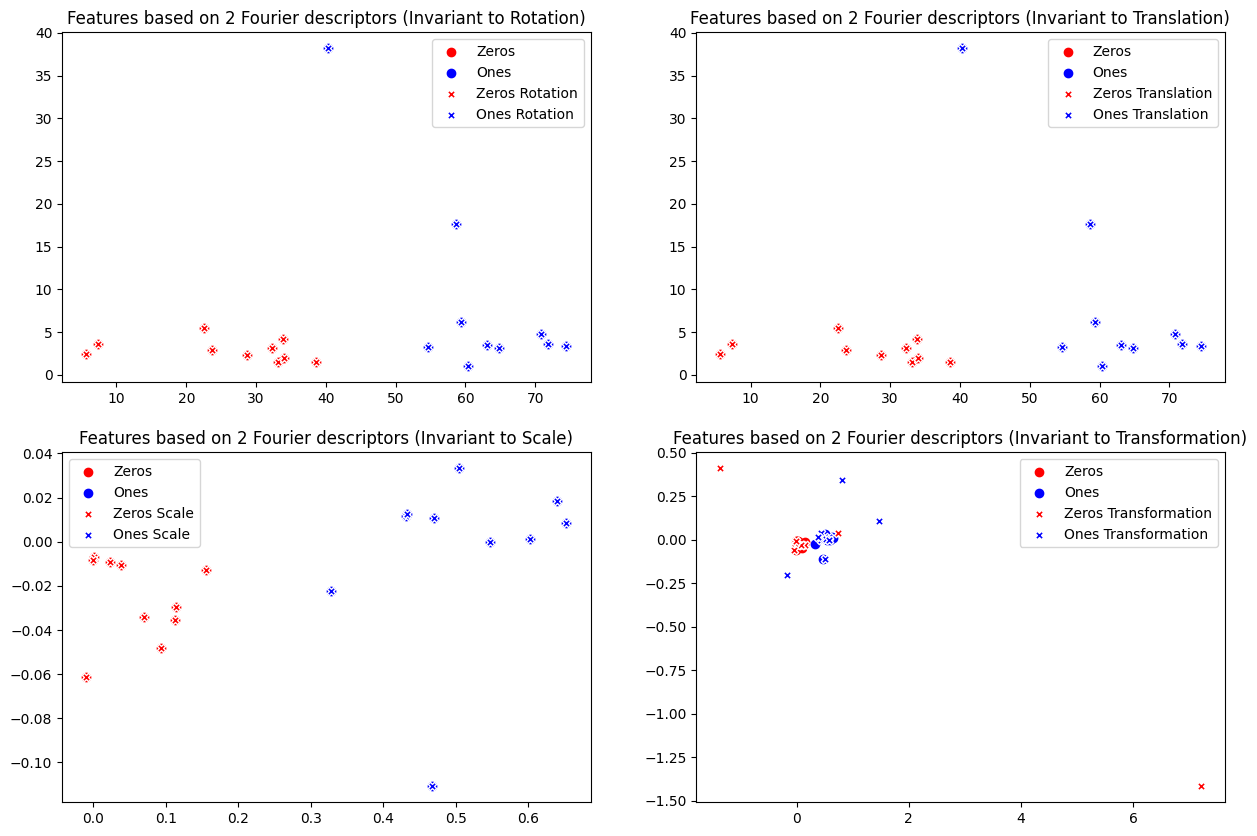

In [26]:
fig, ax = plt.subplots(2, 2, figsize=(15, 10))
ax_list = ax.ravel()
for i, transform in enumerate(transforms):
    # First feature for all "0"s
    zeros_f1 = []
    zeros_f1_transformed = []
    # Second feature for all "0"s
    zeros_f2 = []
    zeros_f2_transformed = []
    # Fist feature for all "1"s
    ones_f1 = []
    ones_f1_transformed = []
    # Second feature for all "1"s
    ones_f2 = []
    ones_f2_transformed = []

    for zero, one, zero_transformed, one_transformed in zip(zeros, ones, *transformed_contours[i]):
        zero_contour = find_contour(zero)
        zero_f = get_invariant_features_contours(
            zero_contour, **transforms[transform])
        zeros_f1.append(zero_f[0])
        zeros_f2.append(zero_f[1])

        one_contour = find_contour(one)
        one_f = get_invariant_features_contours(one_contour, **transforms[transform])
        ones_f1.append(one_f[0])
        ones_f2.append(one_f[1])
        zero_transformed_f = get_invariant_features_contours(
            zero_transformed, **transforms[transform])
        zeros_f1_transformed.append(zero_transformed_f[0])
        zeros_f2_transformed.append(zero_transformed_f[1])

        one_transformed_f = get_invariant_features_contours(
            one_transformed, **transforms[transform])
        ones_f1_transformed.append(one_transformed_f[0])
        ones_f2_transformed.append(one_transformed_f[1])

    ax_list[i].scatter(zeros_f1, zeros_f2, color="r", label="Zeros")
    ax_list[i].scatter(ones_f1, ones_f2, color="b", label="Ones")
    ax_list[i].scatter(
        zeros_f1_transformed,
        zeros_f2_transformed,
        color="r",
        marker="X",
        edgecolor="white",
        label=f"Zeros {transform[13:]}",
    )
    ax_list[i].scatter(
        ones_f1_transformed,
        ones_f2_transformed,
        color="b",
        marker="X",
        edgecolor="white",
        label=f"Ones {transform[13:]}",
    )
    ax_list[i].legend(loc="best")
    ax_list[i].set_title(
        f"Features based on 2 Fourier descriptors ({transform})")
plt.show()


#### Discussion

TODO

## PART 2 - region based descriptors (10 pts)

In this part, you will use the "2"s and "3"s images.

**Objectives overview**:

**1)** *Cluster on compacity*: Based on custom definitions of perimeter and area for each image of "2" and "3" (preprocessed - by you), make a 2D plot with 2-dimensional feature vectors, similar to section 1.4. After that, define the compacity feature for each "2"s and "3"s image. Are you still able to obtain a 1D plot with values clustered in 2 well-defined regions? Discuss your findings. (**6 pts**).

**2)** *Additional method*: Choose one more region-based method (from the course or your own sources - internet allowed) and redo the 1D plot in section 2.1 (or 2D plot, depending on your choosing). Explain your method and your findings. (**4 pts**)

### 2.3. Cluster on compacity (6 pts)

In [27]:
def preprocess(image):
    pre = skimage.filters.gaussian(image, sigma=0.2)
    pre = image > 100
    pre = skimage.morphology.remove_small_holes(pre,200)
    pre = skimage.morphology.remove_small_objects(pre,5)
    return pre

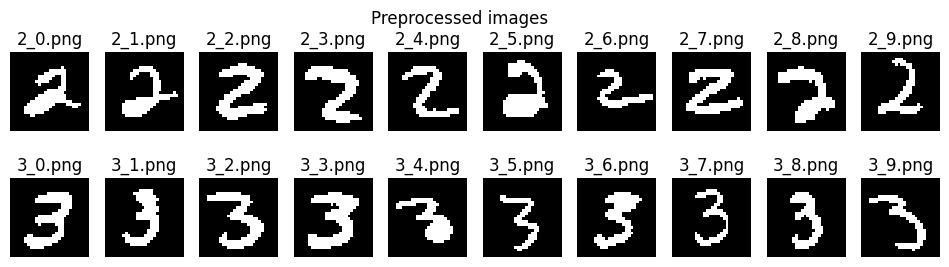

In [28]:
twos = []
threes = []

for img in twos_im:
    twos.append(preprocess(img))
for img in threes_im:
    threes.append(preprocess(img))

# Plot images
fig, axes = plt.subplots(2, len(twos), figsize=(12, 3))
for ax, im, nm in zip(axes[0], twos, twos_names):
    ax.imshow(im, cmap='gray', interpolation="nearest")
    ax.axis('off')
    ax.set_title(nm)
for ax, im, nm in zip(axes[1], threes, threes_names):
    ax.imshow(im, cmap='gray', interpolation="nearest")
    ax.axis('off')
    ax.set_title(nm)
fig.suptitle("Preprocessed images")
plt.show()

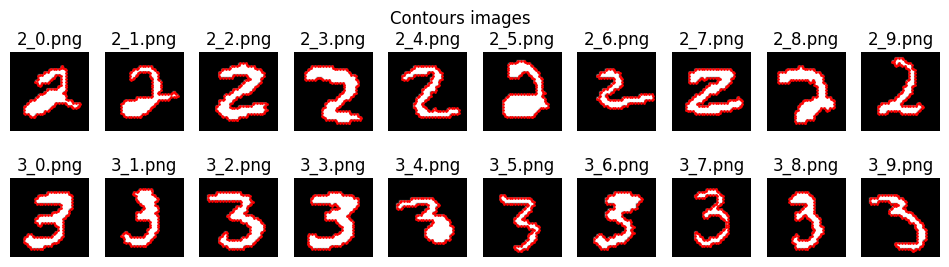

In [29]:
# Plot contours
fig, axes = plt.subplots(2, len(twos), figsize=(12, 3))
for ax, im, nm in zip(axes[0], twos, twos_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
    contours = skimage.measure.find_contours(im)
    for contour in contours:
        ax.scatter(contour[:, 1], contour[:, 0], s=1, color="r")
        
for ax, im, nm in zip(axes[1], threes, threes_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
    contours = skimage.measure.find_contours(im)
    for contour in contours:
        ax.scatter(contour[:, 1], contour[:, 0],s=1, color="r")
fig.suptitle("Contours images")
plt.show()

In [30]:
def area(img):
    return np.count_nonzero(img!=0)

def perimeter(img):
    return skimage.measure.perimeter(img)

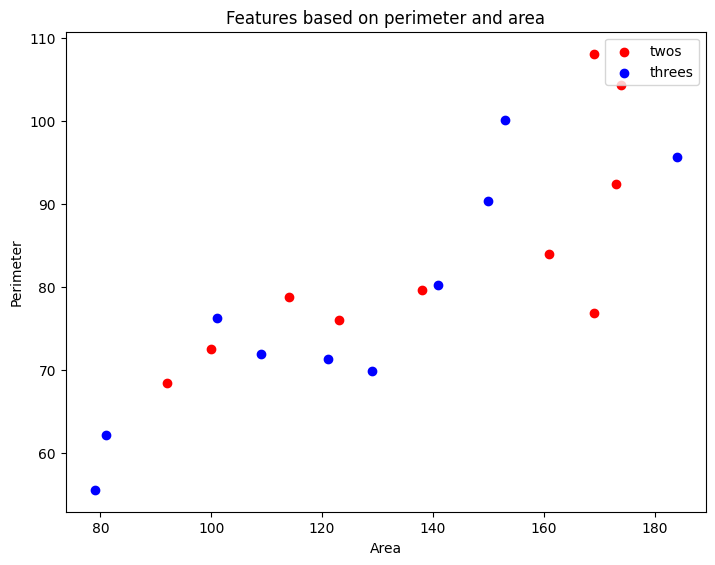

In [31]:
# TODO: Fill the arrays below with the perimeter and area as features for "2"s and "3"s images
twos_f1 = [area(img) for img in twos]
twos_f2 = [perimeter(img) for img in twos]
threes_f1 = [area(img) for img in threes]
threes_f2 = [perimeter(img) for img in threes]

# Plot features for all images
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.scatter(twos_f1, twos_f2, color='r', label='twos')
ax.scatter(threes_f1, threes_f2, color='b', label='threes')
ax.legend(loc='best')
ax.set_ylabel("Perimeter")
ax.set_xlabel("Area")
plt.title("Features based on perimeter and area")
plt.show()

In [32]:
def compacity(img):
    return perimeter(img)**2/area(img)

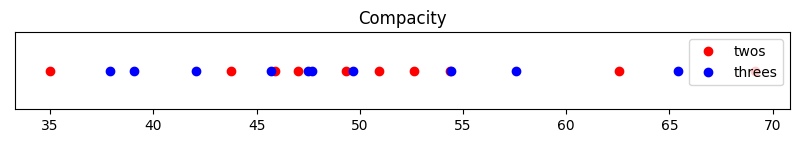

In [33]:
compacity_twos = [compacity(img) for img in twos]
compacity_threes = [compacity(img) for img in threes]

plt.figure(figsize=(10,1))
plt.plot(compacity_twos, np.zeros_like(compacity_twos), "o", color="r", label="twos")
plt.plot(
    compacity_threes, np.zeros_like(compacity_threes), "o", color="b", label="threes"
)
plt.legend()
plt.yticks([])
plt.title("Compacity")
plt.show()

####  Discussion

We can clearly see from the 2D plot that clustering based on compactness is not feasible, as the "twos" and "threes" have similar areas and contour lengths. However, a better approach would be to use the method from Part 1, as although the contour lengths are similar, the shape of the digits is entirely different.

TODO

### 2.2. Additional method (4 pts)

In [34]:
def apply_skel(img):
    skel = skimage.morphology.skeletonize(img)
    footprint = skimage.morphology.square(2)
    pre = skimage.morphology.dilation(skel, footprint)
    return pre

twos_post = [apply_skel(two) for two in twos]
threes_post = [apply_skel(three) for three in threes]

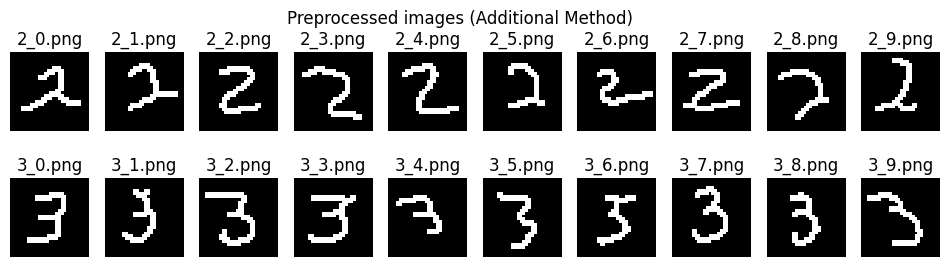

In [35]:
# TEST FEATURES
twos_display = twos_post
threes_display = threes_post

fig, axes = plt.subplots(2, len(twos), figsize=(12, 3))
for ax, im, nm in zip(axes[0], twos_display, twos_names):
    ax.imshow(im, cmap='gray', interpolation="nearest")
    ax.axis('off')
    ax.set_title(nm)
for ax, im, nm in zip(axes[1], threes_display, threes_names):
    ax.imshow(im, cmap='gray', interpolation="nearest")
    ax.axis('off')
    ax.set_title(nm)
fig.suptitle("Preprocessed images (Additional Method)")
plt.show()

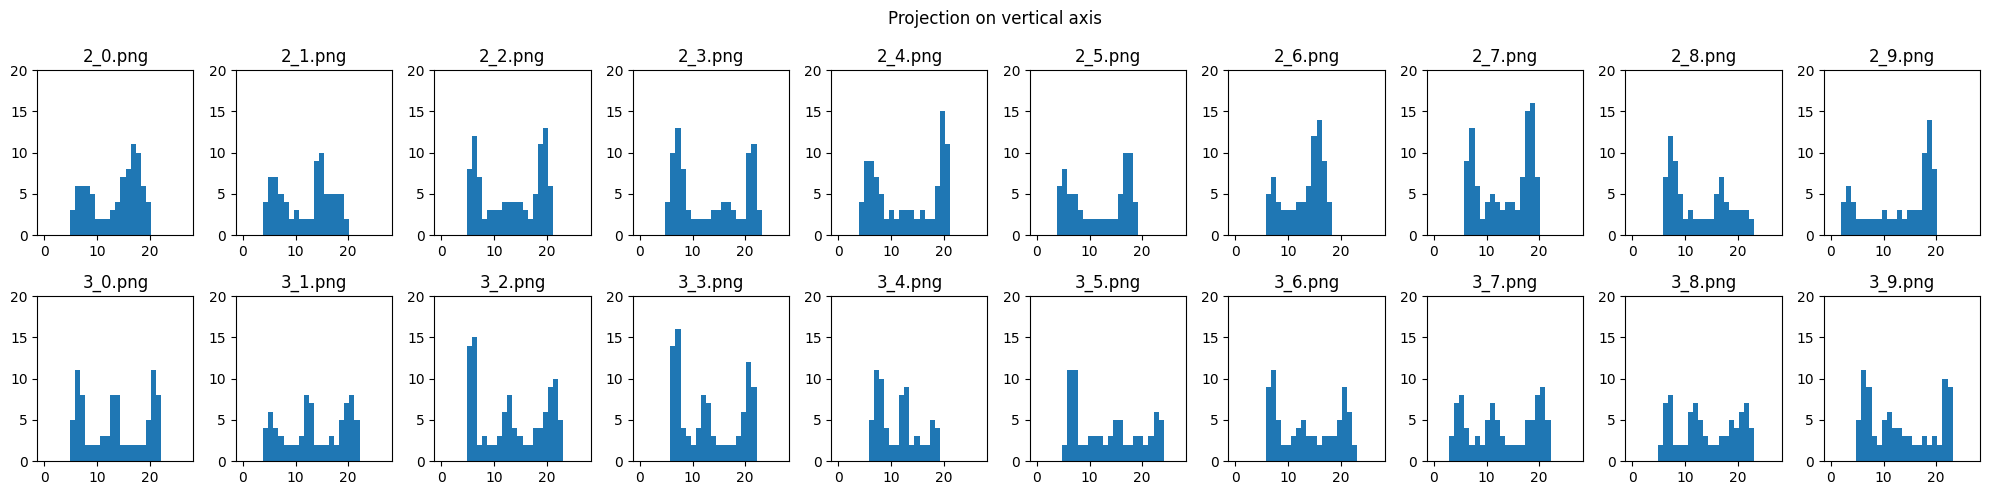

In [36]:
fig, axes = plt.subplots(2, len(twos), figsize=(20, 5))
for ax, im, nm in zip(axes[0], twos_display, twos_names):
    h = np.sum(im, axis=1)
    ax.hist(range(28), bins=28, weights=h)
    ax.set_ylim([0, 20])
    # ax.axis('off')
    ax.set_title(nm)
print()
for ax, im, nm in zip(axes[1], threes_display, threes_names):
    h = np.sum(im, axis=1)
    ax.hist(range(28), bins=28, weights=h)
    ax.set_ylim([0, 20])
    # ax.axis('off')
    ax.set_title(nm)
fig.suptitle("Projection on vertical axis")
plt.tight_layout()

In [37]:
from scipy.signal import find_peaks

# Get the average number of peaks found by find_peaks with different prominence
def get_peaks_number(img, d1=2, d2=6):
    y_sum = np.sum(img, axis=1)
    peak_numbers = [len(find_peaks(y_sum, prominence=d)[0]) for d in range(d1, d2)]
    return np.mean(peak_numbers)

def std(img, axis=1):
    std = np.std(np.sum(img, axis=axis))
    return std


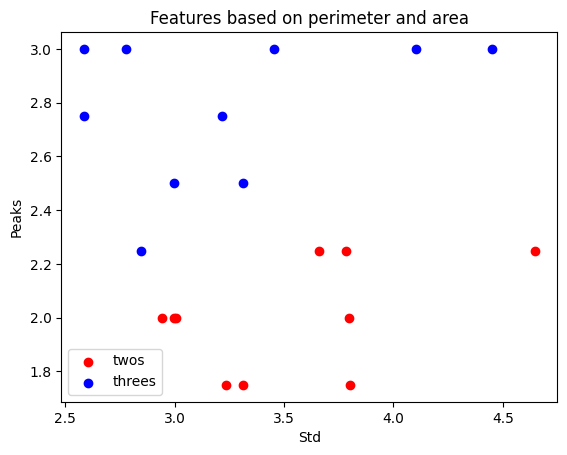

In [38]:
# TODO: Fill the arrays below with the perimeter and area as features for "2"s and "3"s images
twos_f1 = [std(img) for img in twos_post]
twos_f2 = [get_peaks_number(img) for img in twos_post]
threes_f1 = [std(img) for img in threes_post]
threes_f2 = [get_peaks_number(img) for img in threes_post]

# Plot features for all images
plt.scatter(twos_f1, twos_f2, color='r', label='twos')
plt.scatter(threes_f1, threes_f2, color='b', label='threes')
plt.legend(loc='best')
plt.title("Features based on perimeter and area")
plt.xlabel("Std")
plt.ylabel("Peaks")
plt.show()


In [40]:
def project(img):
    x = std(img)
    y = get_peaks_number(img,2,6)
    return np.dot([x,y],[-2,5])


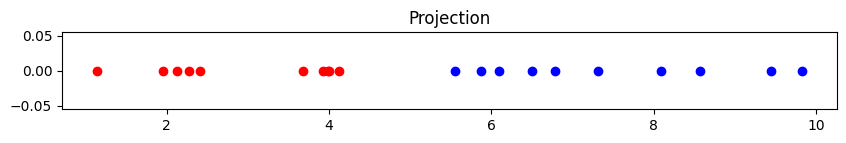

In [41]:
projection_twos = [project(img) for img in twos_post]
projection_threes = [project(img) for img in threes_post]

plt.figure(figsize=(10,1))
plt.plot(projection_twos, np.zeros_like(projection_twos), "o", color="r", label="twos")
plt.plot(
    projection_threes, np.zeros_like(projection_threes), "o", color="b", label="threes"
)
plt.title("Projection")
plt.show()

#### Discussion

Here, we tried to use a different method with a different preprocessing approach. The new method was based on the observation that one difference between "2"s and "3"s is the number of horizontal lines they have, with "3"s having three lines and "2"s having two bars.

We used the method `skeletonize` for the preprocessing, which is a morphological operation that reduces binary objects to a 1-pixel-wide skeleton while preserving their topology. We then dilated the image to obtain 3-pixel-wide skeleton. The dilation was done with a square as it provided better accuracy. It may be because it gives sharper edges, and makes the differences between the "2"s and the "3"s clearer.

For the first criteria, we counted the number of white pixels per line, and counted the number of peaks (refer to the histograms above). In a perfect case, the number of white pixels on a "3" should have three peaks, and two peaks for a "2". The resulting histograms for each figure are shown above.

Furthermore, we found that the standard deviation of the image allowed achieve a perfect 2-D clustering, and by projecting the points, we obtained a perfect 1-D clustering as shown in the figure above. The reason of why the standard deviation of the image works is unclear but may be due to the fact that the "2" that have three peaks are more noisy and more likely to have large standard deviation, which separates the data better. However, to assess the robustness of our model, it would be necessary to test it on a larger set of data.

In conclusion, our new method shows promise in accurately distinguishing between "2"s and "3"s based on the number of pixel per horizontal line and standard deviation of the images. However, further validation and testing is needed to confirm the reliability and generalizability of this approach.

TODO